# Portfolio Part 3 - Analysis of Mobile Price Data (2024 S1)

## Name : Nafi Al Hasan

In this Portfolio task, you will work on a new dataset named 'Mobile Price Data', it contains numerous details about mobile phone hardware, specifications, and prices. Your main task is to train classification models to predict **mobile phone prices** ('price range' in the dataset)and evaluate the strengths and weaknesses of these models.

Here's the explanation of each column:

|Column|Meaning|
|:-----:|:-----:|
|battery power|Total energy a battery can store in one time measured in mAh|
|blue|Has bluetooth or not|
|clock speed|speed at which microprocessor executes instructions|
|dual sim|Has dual sim support or not|
|fc|Front Camera mega pixels|
|four g|Has 4G or not|
|int memory|Internal Memory in Gigabytes|
|m dep|Mobile Depth in cm|
|mobile wt|Weight of mobile phone|
|n cores|Number of cores of processor|
|pc|Primary Camera mega pixels|
|px height|Pixel Resolution Height|
|px width|Pixel Resolution Width|
|ram|Random Access Memory in Mega Bytes|
|sc h|Screen Height of mobile in cm|
|sc w|Screen Width of mobile in cm|
|talk time|longest time that a single battery charge will last when you are|
|three g|Has 3G or not|
|touch screen|Has touch screen or not|
|wifi|Has wifi or not|
|price range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|

Blue, dual sim, four g, three g, touch screen, and wifi are all binary attributes, 0 for not and 1 for yes.

Your high level goal in this notebook is to build and evaluate predictive models for 'price range' from other available features. More specifically, you need to **complete the following major steps**:

1. ***Explore the data*** and ***clean the data if necessary***. For example, remove abnormal instanaces and replace missing values.

2. ***Study the correlation*** between 'price range' with other features. And ***select the variables*** that you think are helpful for predicting the price range. We do not limit the number of variables.

3. ***Split the dataset*** (Trainging set : Test set = 8 : 2)

4. ***Train a logistic regression model*** to predict 'price range' based on the selected features (from the second step). ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.) ***Explain your model and evaluate its performance*** (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).

5. ***Train a KNN model*** to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.)

6. ***Tune the hyper-parameter K*** in KNN (Hints: GridsearchCV), ***visualize the results***, and ***explain*** how K influences the prediction performance.

  Hints for visualization: You can use line chart to visualize K and mean accuracy scores on test set.

Note 1: In this assignment, we no longer provide specific guidance and templates for each sub task. You should learn how to properly comment your notebook by yourself to make your notebook file readable.

Note 2: You will not being evaluated on the accuracy of the model but on the process that you use to generate it and your explanation.

## Importing libraries

In [2]:
# importing necessary libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
# importing the dataset

mobile_price_data = pd.read_csv("Mobile_Price_Data.csv")

## Exploring the dataset

In [4]:
# displaying the dataset

display(mobile_price_data)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756.0,2549.0,9,7,19,0.0,0,1,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988.0,2631.0,17,3,7,1.0,1,0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716.0,2603.0,11,2,9,1.0,1,0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786.0,2769.0,16,8,11,1.0,0,0,2
4,1821,1,1.2,0,13,1,44.0,0.6,141,2,...,1208,1212.0,1411.0,8,2,15,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2.0,0.8,106,6,...,1222,1890.0,668.0,13,4,19,1.0,1,0,0
1996,1965,1,2.6,1,0,0,39.0,0.2,187,4,...,915,1965.0,2032.0,11,10,16,1.0,1,1,2
1997,1911,0,0.9,1,1,1,36.0,0.7,108,8,...,868,1632.0,3057.0,9,1,5,1.0,1,0,3
1998,1512,0,0.9,0,4,1,46.0,0.1,145,5,...,336,670.0,869.0,18,10,19,1.0,1,1,0


In [5]:
# finding the list of columns in the dataset

mobile_price_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
# finding the column types

mobile_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     1999 non-null   float64
 7   m_dep          1999 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       1999 non-null   float64
 13  ram            1999 non-null   float64
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        1999 non-null   float64
 18  touch_sc

In [7]:
# finding the number of data and columns in the dataset

mobile_price_data.shape

(2000, 21)

In [8]:
# finding descriptive statistics of the dataset

mobile_price_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,1999.000000,1999.000000,2000.000000,2000.000000,...,2000.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,1999.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.035018,0.501601,140.249000,4.520500,...,645.108000,1251.566783,2124.218609,12.306500,5.767000,11.011000,0.761381,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.142986,0.288411,35.399655,2.287837,...,443.780811,432.301505,1085.003435,4.213245,4.356398,5.463955,0.426346,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.500000,1207.000000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
# number of records before cleaning the dataset

len_mobile_price_data = len(mobile_price_data)

print("The number of records before cleaning the dataset: ", len_mobile_price_data)

The number of records before cleaning the dataset:  2000


## Cleaning the dataset

### Replacing the missing values of features with their respective means

In [10]:
# checking the missing values

missing_values_mobile_price_data = mobile_price_data.isna().sum()

print(missing_values_mobile_price_data)

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       1
m_dep            1
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         1
ram              1
sc_h             0
sc_w             0
talk_time        0
three_g          1
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [11]:
# making a copy of the original dataset

original_mobile_price_data = mobile_price_data.copy

In [12]:
# replacing the missing values of features with their respective mean

mobile_price_data.loc[mobile_price_data["int_memory"].isna(), "int_memory"] = mobile_price_data["int_memory"].mean()

mobile_price_data.loc[mobile_price_data["m_dep"].isna(), "m_dep"] = mobile_price_data["m_dep"].mean()

mobile_price_data.loc[mobile_price_data["px_width"].isna(), "px_width"] = mobile_price_data["px_width"].mean()

mobile_price_data.loc[mobile_price_data["ram"].isna(), "ram"] = mobile_price_data["ram"].mean()

mobile_price_data.loc[mobile_price_data["three_g"].isna(), "three_g"] = mobile_price_data["three_g"].mean()

In [13]:
# re-checking for the missing values

print(mobile_price_data.isna().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [14]:
# number of records after replacing the missing values of the dataset

len_mobile_price_data = len(mobile_price_data)

print("The number of records after replacing the missing values of the dataset: ", len_mobile_price_data)

The number of records after replacing the missing values of the dataset:  2000


### Calculating and analysing the correlation

In [15]:
# calculating the correlation coefficients between price_range and other variables

corr_mobile_price_data = mobile_price_data.corr()["price_range"]

# ordering the correlation coefficients from highest to lowest

sorted_corr_mobile_price_data = corr_mobile_price_data.sort_values(ascending = False)

# printing the ordered correlation coefficients

print(sorted_corr_mobile_price_data)

price_range      1.000000
ram              0.917043
battery_power    0.200723
px_width         0.165661
px_height        0.148858
int_memory       0.044170
sc_w             0.038711
pc               0.033599
three_g          0.023738
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000159
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


#### Analysing the Correlations with price range and other variables


##### Four most correlated variables
* **price_range** and **ram** have the highest correlation of 0.917849. This indicates that as the RAM (Random Access Memory) of the mobile phone increases, the price range of the phone also tends to increase.
* **price_range** and **battery_power** have the second highest correlation of 0.200931. This suggests that as the battery power (total energy a battery can store in one time measured in mAh) of the mobile phone increases, the price range of the phone also tends to increase.
* **price_range** and **px_width** have the third highest correlation of 0.154740. This indicates that as the pixel width (Pixel Resolution Width) of the mobile phone's display increases, the price range of the phone also tends to increase.
* **price_range** and **px_height** have the fourth highest correlation of 0.137976. Similar to the correlation with px_width, this suggests that as the pixel height (Pixel Resolution Height) of the mobile phone's display increases, the price range of the phone also tends to increase.

##### Four least correlated variables
* **price_range** and **m_dep** have the fourth least correlation of 0.000159. This indicates that the depth of the mobile phone has almost no relationship with the price range of the device. The depth of the phone does not seem to be a significant factor in determining the price range.
* **price_range** and **clock_speed** have the third least correlation of -0.006606, which is very close to 0. This suggests that the speed of the microprocessor has a negligible impact on the price range of the mobile phone.
* **price_range** and **mobile_wt** have the second least correlation of -0.030302, which is also very low. This indicates that the weight of the mobile phone has a very weak negative relationship with the price range. In other words, as the weight of the phone increases, the price range tends to decrease slightly, but this relationship is not very strong.
* **price_range** and **touch_screen** have the least correlation of -0.030411, which is again very close to 0. This suggests that whether the mobile phone has a touch screen or not has little to no impact on the price range of the device.

##### Selected features

For the predictions of **price_range**, the selected features are the four most correlated variables: **ram**, **battery_power**, **px_width**, **px_height**, which have the strongest influence on the **price_range**.

### Finding and Removing Outliers

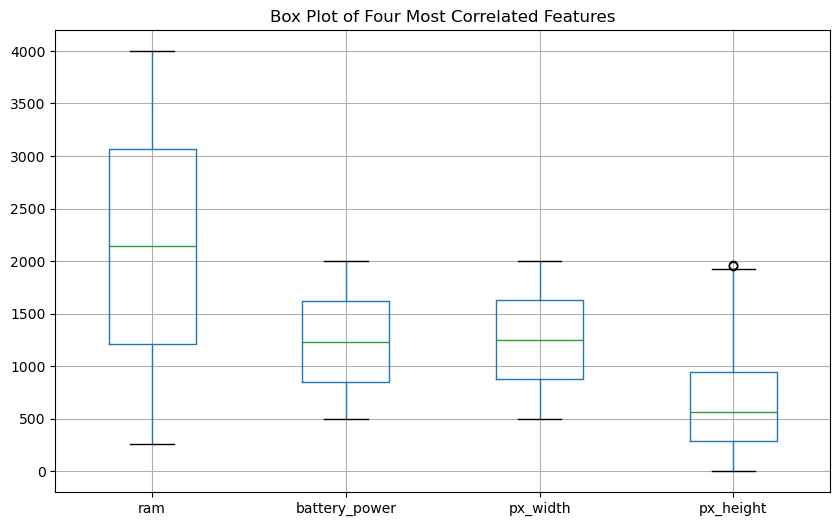

In [16]:
# creating a box plot for four most correlated features

plt.figure(figsize = (10, 6))
mobile_price_data[["ram", "battery_power", "px_width", "px_height"]].boxplot()
plt.title("Box Plot of Four Most Correlated Features")
plt.show()

In [17]:
# calculating first quartile (q1) and third quartile (q3)

px_height_q1 = mobile_price_data["px_height"].quantile(0.25)
px_height_q3 = mobile_price_data["px_height"].quantile(0.75)

# calculating the interquartile range (iqr)

px_height_iqr = px_height_q3 - px_height_q1

# setting the lower and upper bound

px_height_lower_bound = px_height_q1 - 1.5 * px_height_iqr
px_height_upper_bound = px_height_q3 + 1.5 * px_height_iqr

# finding the outliers

outliers = mobile_price_data[(mobile_price_data["px_height"] < px_height_lower_bound) | (mobile_price_data["px_height"] > px_height_upper_bound)]

# printing the number of outliers

print("The number of outliers in the dataset: ", outliers.shape[0])

The number of outliers in the dataset:  2


In [18]:
# dropping outliers from the dataset

cleaned_mobile_price_data = mobile_price_data.loc[~mobile_price_data.index.isin(outliers.index)]

# finding the number of records in the cleaned dataset

print("Number of records in the cleaned dataset:", cleaned_mobile_price_data.shape[0])

Number of records in the cleaned dataset: 1998


### Splitting the dataset (Training set : Test set -> 8 : 2)

In [19]:
# spliting the data into train and test set

train, test = train_test_split(cleaned_mobile_price_data, test_size = 0.2, random_state = 142)

# printing the number of records in the splits

print("Number of records in trining set: ", train.shape[0])
print("Number of records in testing set: ", test.shape[0])

Number of records in trining set:  1598
Number of records in testing set:  400


### Training Logistics Regression Model

In [20]:
# building model with the four most correlated features

x_reg_train = train[["ram", "battery_power", "px_width", "px_height"]]
y_reg_train = train["price_range"]
x_reg_test = test[["ram", "battery_power", "px_width", "px_height"]]
y_reg_test = test["price_range"]

In [21]:
# training the model

reg = LogisticRegression()
reg.fit(x_reg_train, y_reg_train)

LogisticRegression()

In [22]:
# predicting based on training and test set with logistics regression the model

train_reg_predicted = reg.predict(x_reg_train)

test_reg_predicted = reg.predict(x_reg_test)

# printing the predictions

print("Predictions: ", test_reg_predicted)

Predictions:  [1 0 3 3 1 2 2 3 2 3 3 1 0 3 3 3 0 3 1 1 3 0 3 2 0 2 3 3 3 2 0 1 3 2 0 2 0
 1 2 2 3 0 1 2 2 1 1 3 0 0 3 0 3 3 1 2 2 3 0 1 1 3 1 3 2 2 0 3 2 1 0 3 0 1
 0 1 2 2 1 3 3 0 0 1 2 1 2 3 2 2 0 2 2 0 2 0 3 1 0 0 0 3 3 3 0 1 3 1 2 0 1
 2 1 3 1 1 3 0 1 0 2 3 2 2 2 0 2 2 2 1 0 3 1 1 0 0 1 1 0 3 2 2 3 0 3 0 1 1
 1 3 3 3 2 0 0 1 3 3 0 2 2 3 1 1 1 3 3 1 2 0 1 0 3 3 1 1 0 2 2 0 3 2 2 0 2
 3 2 1 0 1 2 1 0 0 0 0 0 1 1 1 2 3 1 2 0 2 2 1 1 1 0 3 0 0 3 1 1 1 1 2 2 3
 2 0 0 0 3 3 2 0 1 2 0 2 1 1 0 0 1 3 2 0 0 2 0 3 3 0 3 1 2 0 0 1 3 1 2 1 1
 1 0 2 1 0 1 3 0 1 3 3 1 0 2 2 1 3 2 3 2 1 3 1 2 1 1 2 3 0 3 0 1 2 2 3 1 2
 2 3 2 2 1 1 2 1 1 1 2 1 1 1 3 3 3 2 1 1 0 3 0 3 0 2 1 2 1 2 1 1 3 0 3 1 1
 2 0 1 2 1 3 0 0 0 1 2 0 3 3 1 2 2 3 0 2 0 0 2 2 0 3 0 0 2 3 2 0 0 1 2 1 1
 2 1 2 3 1 0 1 1 1 1 1 3 1 2 0 2 1 1 1 3 3 0 1 1 1 3 0 2 2 2]


In [23]:
# evaluating the model

test_reg_mse = ((np.array(y_reg_test)-test_reg_predicted) ** 2).sum() / len(y_reg_test)
test_reg_rmse = np.sqrt(test_reg_mse)
test_reg_r2 = r2_score(y_reg_test, test_reg_predicted)
print("Mean Squared Error: ", test_reg_mse)
print("Rooted Mean Squared Error: ", test_reg_rmse)
print("R-Squared: ", test_reg_r2)

Mean Squared Error:  0.055
Rooted Mean Squared Error:  0.2345207879911715
R-Squared:  0.9527326440177253


In [24]:
# evaluating the accuracy score of training and test set for the logistic regression model

train_reg_accuracy = accuracy_score(y_reg_train, train_reg_predicted)
test_reg_accuracy = accuracy_score(y_reg_test, test_reg_predicted)

# printing the accuracy score

print("The accuracy score of the train set: ", train_reg_accuracy)
print("The accuracy score of the test set: ", test_reg_accuracy)

The accuracy score of the train set:  0.9605757196495619
The accuracy score of the test set:  0.945


#### Analysing the Logistic Regression Model

* The MSE is 0.055, which is a relatively low value, indicating that the model's predictions are close to the actual target values on average.
* The RMSE is 0.2345, which is also a low value, suggesting that the model's predictions have a small average deviation from the actual target values.
* The R-Squared value is 0.9527, which is very close to 1. This indicates that the model is able to explain a large proportion of the variance in the target variable, **price_range**, using the selected features.

##### Accuracy of the Model
* The accuracy score on the training set is 0.9606, which is very high. This suggests that the model is able to accurately classify the training data.
* The accuracy score on the test set is 0.945, which is also very high. This indicates that the model is able to generalize well to new, unseen data and maintain a high level of accuracy.

### Training KNN Model

In [25]:
# building train and test set for knn model with the four most correlated features

x_knn_train = train[["ram", "battery_power", "px_width", "px_height"]]
y_knn_train = train["price_range"]
x_knn_test = test[["ram", "battery_power", "px_width", "px_height"]]
y_knn_test = test["price_range"]

# finding the shape of the splits

print("The shape of x_knn_train: ", x_knn_train.shape)
print("The shape of y_knn_train: ", y_knn_train.shape[0])
print("The shape of x_knn_test: ", x_knn_test.shape)
print("The shape of y_knn_test: ", y_knn_test.shape[0])

The shape of x_knn_train:  (1598, 4)
The shape of y_knn_train:  1598
The shape of x_knn_test:  (400, 4)
The shape of y_knn_test:  400


In [26]:
# builiding the KNN model

knn = KNeighborsClassifier(n_neighbors = 22) # selecting k = 22 on ad-hoc basis

# training the KNN model

knn.fit(x_knn_train, y_knn_train)

KNeighborsClassifier(n_neighbors=22)

In [27]:
# predicting based on training and test set

train_knn_prediction = knn.predict(x_knn_train)
test_knn_prediction = knn.predict(x_knn_test)

In [28]:
# evaluating the accuracy score of training and test set for the KNN model

train_knn_accuracy = accuracy_score(y_knn_train, train_knn_prediction)
test_knn_accuracy = accuracy_score(y_knn_test, test_knn_prediction)

# printing the accuracy score

print("The accuracy score of the training set: ", train_knn_accuracy)
print("The accuracy score of the testing set: ", test_knn_accuracy)

The accuracy score of the training set:  0.9449311639549437
The accuracy score of the testing set:  0.9225


#### Analysing the KNN Model


##### Accuracy of the Model
* The accuracy score on the training set is 0.9449, which is very high. This suggests that the KNN model is able to accurately classify the training data.* The accuracy score on the test set is 0.9225, which is also very high. This indicates that the model is able to generalize well to new, unseen data and maintain a high level of accuracy.

The results suggest that the KNN model is performing very well in predicting the **price_range** of mobile phones based on the selected features. The high accuracy scores on both the training and test sets indicate that the model is able to effectively capture the underlying patterns in the data and make accurate predictions. This suggests that the selected features are highly relevant for predicting the **price_range** of mobile phones, and the KNN algorithm is a suitable choice for this classification problem. 
The ad-hoc selection of the initial K value of 22 seems to have resulted in good model performance.

### Tuning the hyper-parameter K

In [29]:
# defining the range of k values to search

k_range = range(1, 31, 2)

# defining the grid search parameters

parameter_grid = {'n_neighbors': k_range}

# perform grid search

grid_search = GridSearchCV(knn, parameter_grid, cv = 5, scoring = "accuracy")
grid_search.fit(x_knn_train, y_knn_train)

# finding the best value of k and accuracy

best_k_value = grid_search.best_params_["n_neighbors"]
accuracy_k = grid_search.best_score_

# printing the best value of k and accuracy

print("Best value of k: ", best_k_value)
print("The Accuracy of best value of k: ", accuracy_k)

Best value of k:  11
The Accuracy of best value of k:  0.9274275078369906


In [30]:
# printing the keys in the cv_results_ attribute

print(grid_search.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


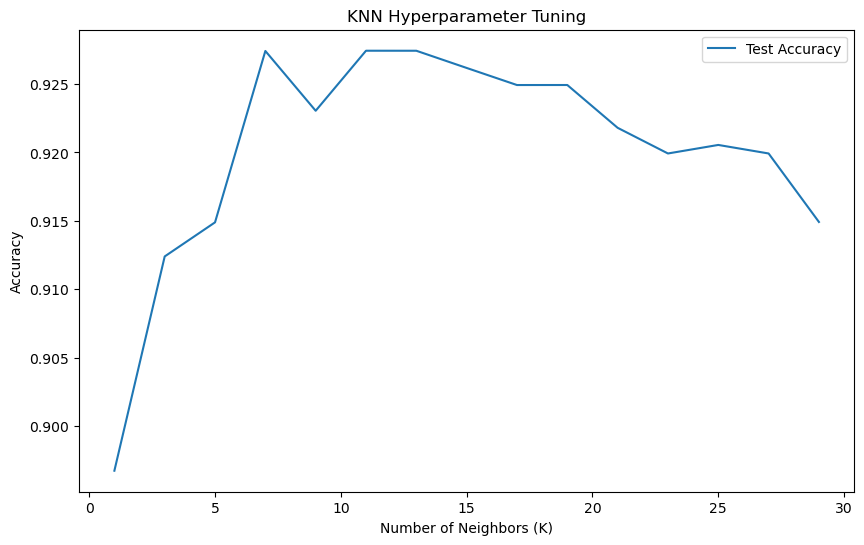

In [31]:
# getting the accuracy scores for each value of k

k_values = list(k_range)
test_scores = grid_search.cv_results_['mean_test_score']

# plotting the results

plt.figure(figsize = (10, 6))
plt.plot(k_values, test_scores, label = "Test Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN Hyperparameter Tuning")
plt.legend()
plt.show()

#### Analysing the tuning of hyper-parameter k

The analysis focuses on training a KNN model to predict the **price_range** of mobile phones based on selected features. The initial KNN model was trained with an ad-hoc value of K set to 22, resulting in an accuracy score of 0.9225 on the test set. To further optimize the model, a GridSearchCV process was used to tune the hyperparameter K, which identified the optimal value of K as 11. With this optimal value of K, the KNN model achieved an improved accuracy score of 0.9274 on the test set. The tuning of the K hyperparameter through GridSearchCV has helped to improve the model's generalization capabilities, making it a reliable and accurate predictor for this classification problem.

##### Explaining how k influences prediction performance

The value of K in the KNN algorithm determines the number of nearest neighbors considered when making a prediction. A smaller K means the model relies on fewer neighbors, while a larger K means it considers more neighbors.

This choice involves a trade-off between bias and variance:
- A smaller K can lead to a more complex model with lower bias but higher variance, potentially overfitting the training data.
- A larger K can result in a simpler model with higher bias but lower variance, potentially undefitting.


The optimal K strikes a balance, providing the best predictive performance on the test data. Techniques like GridSearchCV help identify this value by evaluating the model's accuracy across a range of K values.
In this case, the best K was found to be 11, suggesting this value offers the right balance between bias and variance for the given dataset.

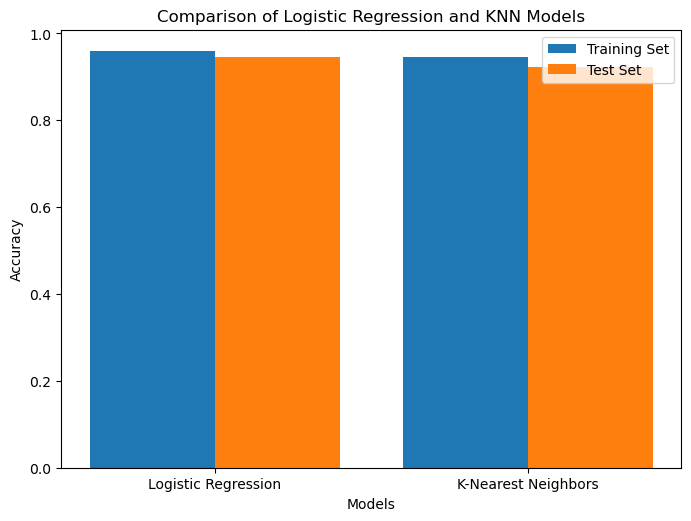

In [32]:
# creating a bar graph to compare both models

models = ["Logistic Regression", "K-Nearest Neighbors"]
train_accuracies = [train_reg_accuracy, train_knn_accuracy]  
test_accuracies = [test_reg_accuracy, test_knn_accuracy]

# creating the figure and axis

fig, ax = plt.subplots(figsize = (8, 6))

# setting the x-axis positions for the bars

x = np.arange(len(models))
bar_width = 0.4

# plotting the training and test accuracy bars

ax.bar(x - bar_width / 2, train_accuracies, bar_width, label = "Training Set")
ax.bar(x + bar_width / 2, test_accuracies, bar_width, label = "Test Set")

# adding labels and title

ax.set_xlabel("Models")
ax.set_ylabel("Accuracy")
ax.set_title("Comparison of Logistic Regression and KNN Models")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# adjusting the spacing between the bars

plt.subplots_adjust(bottom = 0.15)
plt.show()

#### Comparing both models

This analysis compares the performance of the Logistic Regression and KNN models in predicting the **price_range** of mobile phones. The Logistic Regression model achieved a very high accuracy score of 0.9606 on the training set and 0.945 on the test set, indicating that it is able to accurately classify the mobile phones into the correct price range categories. Similarly, the KNN model also performed exceptionally well, with a training accuracy of 0.9449 and a test accuracy of 0.9225. The high accuracy scores for both models suggest that they are able to effectively capture the underlying patterns in the data and generalize well to new, unseen samples. The bar graph visualization further highlights the comparable performance of the two models, with the Logistic Regression model slightly outperforming the KNN model on both the training and test sets. Overall, both the Logistic Regression and KNN models appear to be reliable and accurate predictors of the **price_range** for the mobile phones in the dataset.